# Fourier Transform Based 2D Reconstruction

This example will demonstrate how the Central Slice Theorem can be used to reconstruct a 2D image from a 2D sinogram. 

Before starting you will need several modules:
1. os.path to check that the file you are trying to open exists in the current working directory
2. math to calculate the rotation angle as a function of projection view
3. matplotlib so that you can plot results and display images
4. numpy to perform numerical operations
5. scipy.interpolate and scipy.interpolation as these types of operations will be needed during the reconstruction stage
6. scipy.fftpack to perform the required Fourier domain operations on the data. 
7. scipy.misc to access the various image reading and writing utilities 

In [3]:
%matplotlib inline

import os.path
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import scipy.interpolate
import scipy.fftpack
import scipy.misc
import scipy.ndimage.interpolation

Some helper functions to perform simple, repetitive mathematical operations

In [12]:
def angle(i): 
    return (math.pi*i)/N
    
def sqr(x): 
    return x * x

A simple test function to ensure that the file the user is trying to open exists in the current working directory

In [4]:
def testInput(filename):
    assert os.path.isfile(filename), "%r does not exist" % filename  

Get the filename from the user, test it with the helper function and then open the image. 

Please Enter Sinogram File Name: Sinogram.jpg


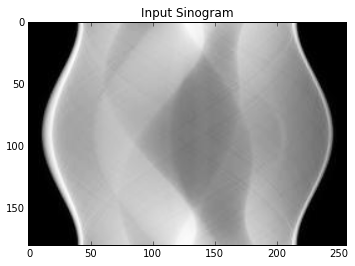

In [8]:
filename = raw_input("Please Enter Sinogram File Name: ")

testInput(filename);

sinogram = scipy.misc.imread(filename)

plt.imshow(sinogram, cmap=cm.Greys_r)
plt.title('Input Sinogram')
plt.show()


Get the dimensions of the Sinogram using .shape. This will help during the computation of the reconstruction and initialisation of the resultant image. 

In [9]:
N, S = sinogram.shape

Compute the rows of the Fast Fourier Transform (FFT) of the sinogram.

In [10]:
sinogram_ifftshift = scipy.fftpack.ifftshift(sinogram, axes=1);
sinogram_fft = scipy.fftpack.fft(sinogram_ifftshift);
sinogram_fft_rows = scipy.fftpack.fftshift(sinogram_fft, axes=1)

Compute the grid in which to perform the reconstruction. The real space grid axes are 0:N and -imageSize/2 -> +imageSize/2. In this example -128 -> +127

In [13]:
a = np.array([angle(i) for i in xrange(N)])
r = np.arange(S) - S/2;
r, a = np.meshgrid(r, a);
r = r.flatten();
a = a.flatten();
srcx = (S/2)+r*np.cos(a)
srcy = (S/2)+r*np.sin(a)

Create a grid which represents the grid for the reconstructed Image

In [14]:
dstx, dsty = np.meshgrid(np.arange(S), np.arange(S))
dstx = dstx.flatten()
dsty = dsty.flatten()

Reconstruct the Image

In [15]:
fft2 = scipy.interpolate.griddata(
(srcy, srcx), sinogram_fft_rows.flatten(), 
(dsty, dstx),
method='cubic',
fill_value=0.0
).reshape((S, S))

In [16]:
recon = np.real(scipy.fftpack.fftshift(
scipy.fftpack.ifft2(
scipy.fftpack.ifftshift(fft2))))

Save the Image to a user defined file name

In [17]:
filename = raw_input('Please Enter Reconstruction File Name: ')
scipy.misc.imsave(filename, recon)

Please Enter Reconstruction File Name: Recon.jpg


Display the Reconstructed Image

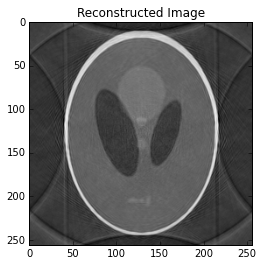

In [18]:
plt.imshow(recon, cmap=cm.Greys_r)
plt.title('Reconstructed Image')
plt.show()